<center> 
    
# 构建你的第一个AI项目

</center>

<div class="alert alert-block alert-success">  
 <b>Version:</b> v0.1 <b>Date:</b> 2020-06-09 
    
在本课程中，我们将着手构建一个端到端的人工智能项目，回顾前述课程学习的内容，通过动手实践来强化对相关概念和知识的认识及了解。 
希望对你未来的工作会有所帮助。
</div>


<div class="alert alert-block alert-info">
<b>💡:</b> 

- 预计时间： 2小时-3小时；
- 技能要求：基本的编程知识(如果会点python更好)；  
- 前期准备：人工智能实训平台账号 + 可以连接网络的浏览器
- Binder: [Click Here](https://mybinder.org/v2/gh/ddebby/First_AI_Project/master?filepath=01.lab_your_first_ai_project.ipynb)
</div>

### 本文档中相关注释说明

<div class="alert alert-block alert-info">
<b>提示💡:</b> 

蓝色给大家一些新的提示要点，可以进行拓展操作.
</div>

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

这部分会对学过的知识进行关联和回顾，便于大家进行巩固.  
</div>

<div class="alert alert-block alert-success">  
概要✅：

绿色部分为章节内容核心点，提醒关注。  
</div>

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
红色标识了重点注意事项，提醒大家注意.   
</div>

<details><summary>🤔--这是被隐藏的内容，思考之后再打开👇</summary>
<center>
>
>
打开之后你将看到内容的详情 ...
>
>
</center>
</details>

### 关于Jupyter Notebook的简单说明

<div class="alert alert-block alert-success">  

✅这是用来做什么的？
    
✅基本操作：

- 文档（Markdown Cell） + 代码（Code Cell）
- 如何增加、删除cell
- 如何执行代码（快捷键：`Shift + Enter`）
- 如何自动补全
- 如何查看函数详情
- 如何保存与导出、上传与下载
</div>

> 此处插入一个架构图？？

## Step 00. 项目背景

<div class="alert alert-block alert-success">  
概要✅：

> 假设你所在公司受一个动物保护协会委托，要为他们开发一款软件，用来通过部署在自然保护区的监控摄像头捕获照片，并利用人工智能算法自动识别图像中的动物类型。通过构建这样一套监控系统，有助于他们快速统计相关珍惜动物的生活习性及繁殖情况，有利于提前对濒临灭绝的珍稀物种进行必要的援助。
</div>

<center class="half">
    <img src="imgs/181.gif" width="230"/><img src="imgs/218.gif" width="230"/><img src="imgs/246.gif" width="230"/><img src="imgs/340.gif" width="230"/>
</center>

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
分析用户需求尽量考虑全面、思考周详，开展工作尽量缩小范围，聚焦核心.   
</div>

<div class="alert alert-block alert-success">  
✅：
    
- 为了评估这件事情的可行性，我们通过一个课程实验重点关注这套系统中人工智能识别部分的可行性。在PoC阶段，为了降低问题的复杂性，我们将选取几种容易获取的物种照片，通过检索引擎快速搜索图片，构建原型模型。
    
- 为了快速对用户的问题进行分析，我们没办法及时从客户手中获得足够多的数据，但如果客户场景数据容易通过公共渠道快速获取，我们可以利用相关工具获取部分数据(比如比赛数据、用户分享数据、检索引擎数据)；
    
- 在本实验中，为了能够在2-3个小时内，能够完成这个项目，我们理想化的处理可行性分析阶段的数据，缩小范围为识别几种常见的🐕的品种。
    
</div>

### 实验中使用的工具说明

In [1]:
from utils import *
from fastai2.vision.widgets import *

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

人工智能计算框架回忆、回忆、... 😪  
</div>

> TO-DO： fastai的简单介绍内容

### 人工智能项目构建流程回顾

<details><summary>🤔--还记得人工智能项目构建流程么？👇</summary>
<center>
<img src="imgs/arch.jpg" height="300" width="70%">
</center>
</details>

<details><summary>🤔--产品经理vs工程师视角--</summary>
<center>
<img src="imgs/workflow.png" height="200" width="50%">
</center>
</details>

## Step 01. 问题定义与描述

<div class="alert alert-block alert-danger">  
<b>重要📌</b>

- 问题： 自然场景下的图像分类问题；
- 输入：一张带🐕图像；
- 输出： 图像中🐕的类型；

</div>

<div class="alert alert-block alert-info">
<b>💡:实践是检验真理的唯一标准</b> 

- 为了简化问题，我们忽略了图像中没有狗、同时有多只狗等复杂的场景，试想一下如果遇到这种复杂问题我们该如何解决？
    
- 把问题想清楚很重要，但空想没有太大意义；So 实践是检验真理的唯一标准！
    
- 问题抽象的重要性！
</div>

## Step 02. 数据准备

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

还记得数据准备阶段的做菜几步法么？
</div>

<center>
<img src="imgs/data_preparing.png" height="200" width="50%">
</center>

### 00.试吃--尝尝数据的味道

<div class="alert alert-block alert-success">  
概要✅：

在本次实验中选择了三种🐕的品种，进行数据采集，分别是：京巴、 泰迪、柯基犬；

🤔： 为什么选这三种？
</div>

### 01.使用接口服务，快速获取数据

<div class="alert alert-block alert-success">  
概要✅：

注册Bing的搜索Key： https://azure.microsoft.com/en-us/try/cognitive-services/?api=bing-image-search-api 
</div>

> TO-DO: 增加一个注册bing search key的说明，比较简单

In [163]:
key = 'xxx'

In [164]:
search_images_bing??

Signature:
search_images_bing(
    key,
    term,
    endpoint='https://api.cognitive.microsoft.com',
    min_sz=128,
)
Docstring: <no docstring>
Source:   
def search_images_bing(key, term, endpoint='https://api.cognitive.microsoft.com', min_sz=128):
    client = api(endpoint, auth(key))
    return L(client.images.search(query=term, count=150, min_height=min_sz, min_width=min_sz).value)
File:      ~/gaoc/notebooks/1.Courses/fastbook/saved/First_AI_Project/utils.py
Type:      function


In [51]:
results = search_images_bing(key,'泰迪犬')
ims = results.attrgot('content_url')
len(ims)

150

In [165]:
ims

(#150) ['http://file2.zhituad.com/thumb/201203/06/201203061230229740tUGXL_priv.jpg','http://p0.qhimg.com/t014d6f1077ada91a33.jpg','http://img.zcool.cn/community/01c5bc597d957fa8012156031ea772.jpg@2o.jpg','http://pic22.nipic.com/20120709/10095432_224914836000_2.jpg','https://gss0.baidu.com/94o3dSag_xI4khGko9WTAnF6hhy/zhidao/pic/item/d52a2834349b033b1b22c76312ce36d3d439bde4.jpg','https://gss0.baidu.com/9vo3dSag_xI4khGko9WTAnF6hhy/zhidao/pic/item/342ac65c103853431a8bc4da9813b07ecb808881.jpg','http://www.baobeita.com/upload/image/goods/201304/100489/big_457bab4a3c444b45aabd46ce9bbd33af.jpg','http://pic.baike.soso.com/p/20120803/20120803173107-623917741.jpg','http://a1.att.hudong.com/86/46/01300000167306121462462110430.jpg','http://p3.gexing.com/G1/M00/E1/CC/rBACFFNbVJWBBorfAALqSe15VuE425.jpg'...]

In [167]:
dest = 'Teddy_Dog.jpg'
download_url(ims[1], dest)

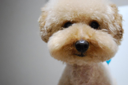

In [168]:
im = Image.open(dest)
im.to_thumb(128,128)

#### 获得三种类别不同品种的狗狗

> 此处选择三种我可以辨认的狗狗，便于测试，你们可以根据喜好选择自己的。

In [2]:
dog_types = ['京巴犬','泰迪犬','柯基犬']

In [2]:
path = Path('dogs')

In [ ]:
if not path.exists():
    path.mkdir()
    
for o in dog_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, o)
    download_images(dest, urls=results.attrgot('content_url'))

> 由于下载过程需要一些时间，此处可以和大家聊聊无法下载的图像的处理策略以及其它的方法来快速获得所需要的数据。

In [3]:
path.ls()

(#3) [Path('dogs/泰迪犬'),Path('dogs/京巴犬'),Path('dogs/柯基犬')]

In [3]:
images = get_image_files(path)
images

(#384) [Path('dogs/泰迪犬/00000007.jpg'),Path('dogs/泰迪犬/00000127.jpg'),Path('dogs/泰迪犬/00000028.jpg'),Path('dogs/泰迪犬/00000046.jpg'),Path('dogs/泰迪犬/00000085.jpg'),Path('dogs/泰迪犬/00000128.jpg'),Path('dogs/泰迪犬/00000055.jpg'),Path('dogs/泰迪犬/00000090.jpg'),Path('dogs/泰迪犬/00000139.jpg'),Path('dogs/泰迪犬/00000078.jpg')...]

### 02.数据治理

#### 数据清理

In [6]:
a  = L([o.suffix for o in images])
a.unique()

(#5) ['.jpg','.gif','.jpeg','.png','.JPG']

下载下来的图片，格式（jpeg、png、gift等）、大小都不一致，需要进行一波清理，fast.ai提供了一个verify_images的工具，可以对图像进行基本的清理操作：

> verify_images 是一个很有用的函数，会查看该图片是否损坏、是否使用合适的channel数目，是否需要调整到指定大小或超过了限定大小

In [68]:
failed = verify_images(images)
failed

(#34) [Path('dogs/泰迪犬/00000135.jpg'),Path('dogs/泰迪犬/00000126.jpg'),Path('dogs/泰迪犬/00000026.jpg'),Path('dogs/泰迪犬/00000111.jpg'),Path('dogs/泰迪犬/00000032.jpg'),Path('dogs/泰迪犬/00000120.jpg'),Path('dogs/泰迪犬/00000080.jpg'),Path('dogs/泰迪犬/00000043.jpg'),Path('dogs/泰迪犬/00000009.jpg'),Path('dogs/泰迪犬/00000142.jpg')...]

我们可以通过一个`unlink`方法把失败的图像从图像的地址空间中清除

In [69]:
failed.map(Path.unlink);

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

开始构建数据集，一个人工智能数据集中一般要明确如下几个关键内容：
1. 你的输入数据是什么？ 输出数据是什么？
2. 你的数据存在哪里？ 模型该如何获取你的数据？
3. 数据集是否需要切分训练集和验证集？
4. 标记数据集：该如何获取数据的标签？
5. 该如何对数据进行预处理（满足模型要求）？
</div>

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
在人工智能的数据处理中，经常讲一个概念叫做'pipeline',描述的是一个数据流处理的管道，原始数据输入，整理好的可以直接使用的数据输入到模型。pipeline本身就是个数据处理模式，可以套用到任何类似的场景和应用。
    
比如下面我们构建的这个就适用于绝大多数图像分类的问题。
</div>

In [3]:
data = DataBlock(
        blocks=(ImageBlock, CategoryBlock), #输入 与 输出
        get_items=get_image_files, # 数据哪里来
        splitter=RandomSplitter(valid_pct=0.2, seed=42), # 如何切分数据集
        get_y=parent_label, # 如何标记数据
        item_tfms=Resize(128)) # 如何进行数据预处理

> 数据集切分：20%测试数据，80%训练数据

![替代文字](https://raw.githubusercontent.com/ddebby/labs/master/pics/Data_split.png)

> TBD: Need some code for print the train and valid datasets

In [6]:
dogs = data.dataloaders(path)

In [7]:
len(dogs.train_ds),len(dogs.valid_ds)

(308, 76)

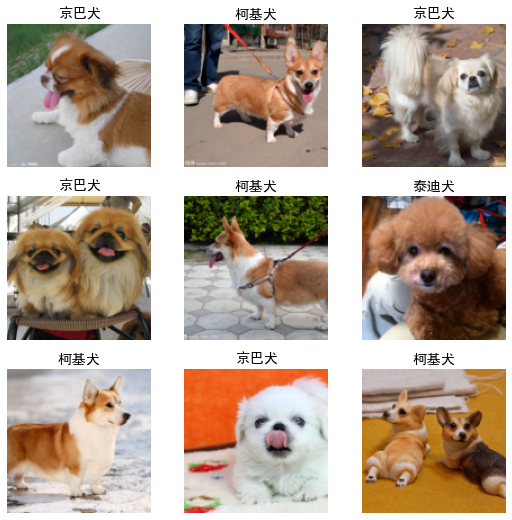

In [88]:
dogs.show_batch()

#### 数据增强

<div class="alert alert-block alert-success">  
✅：

图像增强技术是在小样本下可以保证模型学习效果的有效途径，也是防止过拟合的一种手段，常用的图像增强方法包括：平移、缩放、旋转、随机扣取 ...
</div>

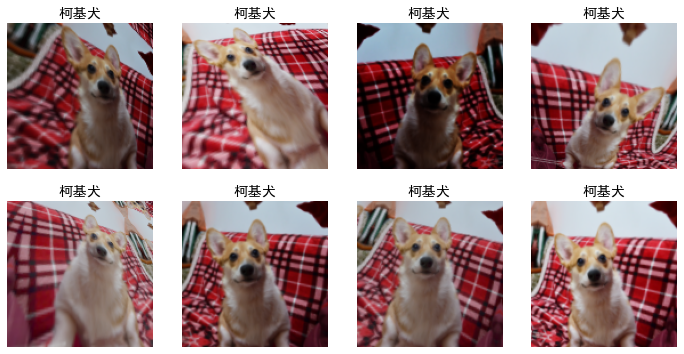

In [90]:
data = data.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = data.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

#### 几个有意思的图像增强方法

**随机遮挡**

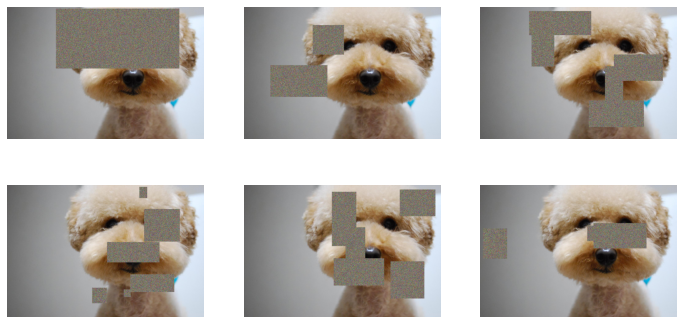

In [95]:
tfm = RandomErasing(p=1., max_count=6)
nrm = Normalize.from_stats(*imagenet_stats, cuda=False)
timg = TensorImage(array(im)).permute(2,0,1).float()/255.
_,axs = subplots(2,3, figsize=(12,6))
f = partial(tfm, split_idx=0)
for i,ax in enumerate(axs.flatten()): show_image(norm_apply_denorm(timg, f, nrm)[0], ctx=ax)

**Mixup**

![](imgs/mixup.jpg)
![](imgs/mixup02.jpg)

<div class="alert alert-block alert-info">
<b>提示💡:</b> 

如果你对数据增强感兴趣，可以关注开源库[albumentations](https://github.com/albumentations-team/albumentations)
</div>

### 03.切菜——图像数据的表示

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

现实世界中的数据在计算机中的表示方法——张量
   
- 向量数据：2D 张量，形状为 (samples, features)。

- 时间序列数据或序列数据：3D 张量，形状为 (samples, timesteps, features)。 

- 图像：4D张量，形状为(samples, height, width, channels)或(samples, channels, height, width)。

- 视频：5D张量，形状为(samples, frames, height, width, channels)或(samples, frames, channels, height, width)。
    
</div>

<center>
<img src="imgs/img_data.png" height="200" width="50%">
</center>

<div class="alert alert-block alert-info">
<b>举例💡:</b> 

如果图像大小为 256×256，那么 128 张灰度图像组成的批 量可以保存在一个形状为(128, 256, 256, 1)的张量中，而 128 张彩色图像组成的批量则可以保存在一个形状为(128, 256, 256, 3)的张量中。
</div>

In [110]:
im3 = Image.open("imgs/im3.jpg")
im3

In [119]:
# Display as text
import pandas as pd
df = pd.DataFrame(tensor(im3))
df.style.set_properties(**{'font-size':'4pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,1,0,0,0,4,2,0,0,13,0,0,0,9,0,8,0,0,0,0,1,11,0,5,0,0,0,0
1,8,3,0,0,2,0,0,7,6,0,3,12,1,0,0,0,0,4,2,4,0,3,0,0,0,0,0,0
2,0,3,0,0,12,3,0,9,12,0,0,0,1,11,16,4,0,0,0,7,0,6,12,9,0,0,0,0
3,0,11,0,0,3,3,0,0,0,18,7,1,0,0,0,0,4,0,0,9,0,0,0,0,0,0,0,0
4,2,4,0,0,8,7,1,10,0,0,0,0,6,0,0,0,11,0,0,1,6,2,11,8,0,0,0,0
5,6,0,0,13,8,0,0,0,5,38,159,195,249,249,255,173,181,150,110,9,0,0,0,0,0,0,0,0
6,7,0,4,5,0,0,35,47,165,213,255,240,226,215,244,255,255,251,206,6,0,0,8,13,0,0,0,0
7,0,0,12,0,0,105,222,248,245,199,36,21,10,1,6,193,241,255,242,0,0,6,1,0,0,0,0,0
8,5,0,4,0,3,115,234,255,233,43,0,2,0,12,0,193,250,254,153,0,0,4,0,5,0,0,0,0
9,0,0,10,9,0,10,39,25,12,21,0,1,6,0,46,229,253,252,73,0,14,0,0,0,0,0,0,0


>TBD - What About Y?

In [136]:
x,y = dogs.one_batch()

In [138]:
y

TensorCategory([1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0],
       device='cuda:0')

In [135]:
dogs.train.vocab.o2i

{'京巴犬': 0, '柯基犬': 1, '泰迪犬': 2}

#### 如何将不同尺度的蔬菜切的整齐划一？

In [140]:
dogs.dataset

(#308) [(PILImage mode=RGB size=1024x971, TensorCategory(1)),(PILImage mode=RGB size=551x364, TensorCategory(0)),(PILImage mode=RGB size=1152x864, TensorCategory(0)),(PILImage mode=RGB size=300x225, TensorCategory(0)),(PILImage mode=RGB size=800x1200, TensorCategory(2)),(PILImage mode=RGB size=620x428, TensorCategory(0)),(PILImage mode=RGB size=422x566, TensorCategory(0)),(PILImage mode=RGB size=400x300, TensorCategory(0)),(PILImage mode=RGB size=500x322, TensorCategory(2)),(PILImage mode=RGB size=1280x1024, TensorCategory(1))...]

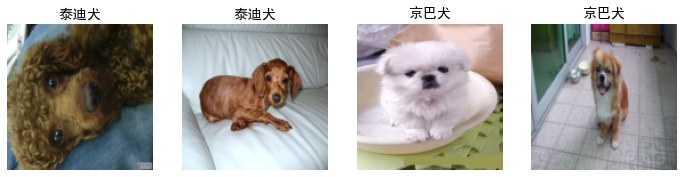

In [141]:
data = data.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = data.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

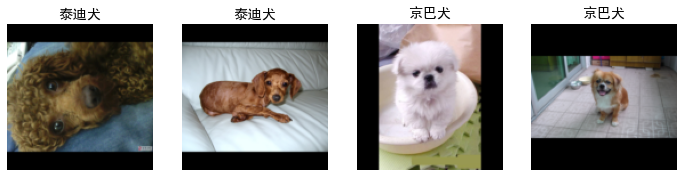

In [142]:
data = data.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = data.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

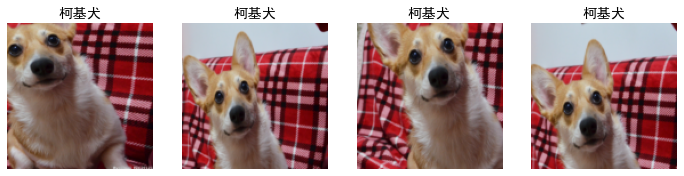

In [143]:
data = data.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = data.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### 04.上菜——图像展示

In [ ]:
dls.show_batch()

## Step 03. 成功的目标与评估指标

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

图像分类问题的评价指标是什么？
    
</div>

**准确率**

In [4]:
accuracy??

**f1**

In [5]:
f1_score = FBeta(average='macro', beta=1)

**推理时间**

```python
%timeit
```

In [2]:
%timeit (1+1)

7.18 ns ± 0.162 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


**模型大小**

> TO-DO： 举个目标检测的监控指标项的🌰

## Step 04. 确定基线快速建模

In [6]:
data = DataBlock(
        blocks=(ImageBlock, CategoryBlock), #输入 与 输出
        get_items=get_image_files, # 数据哪里来
        splitter=RandomSplitter(valid_pct=0.2, seed=42), # 如何切分数据集
        get_y=parent_label, # 如何标记数据
        item_tfms=RandomResizedCrop(128, min_scale=0.5),# 如何进行数据预处理
        batch_tfms=aug_transforms()) # 批量图片处理：数据增强方法
dogs = data.dataloaders(path)

In [7]:
dogs.vocab

(#3) ['京巴犬','柯基犬','泰迪犬']

In [8]:
dogs.dataset

(#308) [(PILImage mode=RGB size=1024x971, TensorCategory(1)),(PILImage mode=RGB size=551x364, TensorCategory(0)),(PILImage mode=RGB size=1152x864, TensorCategory(0)),(PILImage mode=RGB size=300x225, TensorCategory(0)),(PILImage mode=RGB size=800x1200, TensorCategory(2)),(PILImage mode=RGB size=620x428, TensorCategory(0)),(PILImage mode=RGB size=422x566, TensorCategory(0)),(PILImage mode=RGB size=400x300, TensorCategory(0)),(PILImage mode=RGB size=500x322, TensorCategory(2)),(PILImage mode=RGB size=1280x1024, TensorCategory(1))...]

### 训练基线模型

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

还记得**迁移学习**么？ 
</div>

<center>
<img src="imgs/transfer_learning.png" height="200" width="60%">
</center>

In [9]:
learn = cnn_learner(dogs, resnet18, metrics=[accuracy,f1_score])
learn.summary()

Sequential (Input shape: ['64 x 3 x 128 x 128'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 64 x 64    9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 64 x 64    128        True      
________________________________________________________________
ReLU                 64 x 64 x 64 x 64    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 32 x 32    0          False     
________________________________________________________________
Conv2d               64 x 64 x 32 x 32    36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 32 x 32    128        True      
________________________________________________________________
ReLU                 64 x 64 x 32 x 32    0          False     
_________________________________________________

In [10]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,1.763219,0.399519,0.881579,0.876324,00:04


epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.564037,0.324527,0.934211,0.933092,00:03
1,0.430666,0.210239,0.947368,0.946325,00:04
2,0.352890,0.195697,0.960526,0.960443,00:04
3,0.284399,0.168929,0.973684,0.973575,00:03


### 训练结果分析

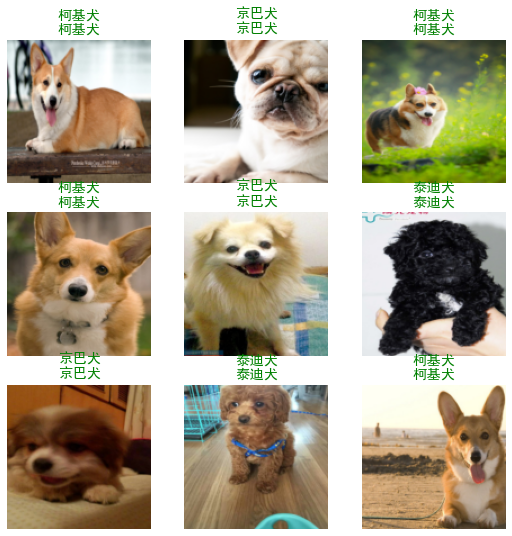

In [150]:
learn.show_results()

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

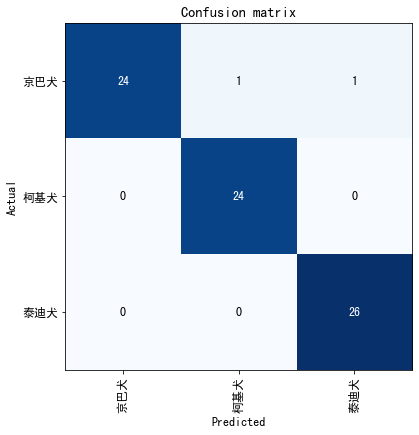

In [12]:
interp.plot_confusion_matrix(figsize=(6,6))

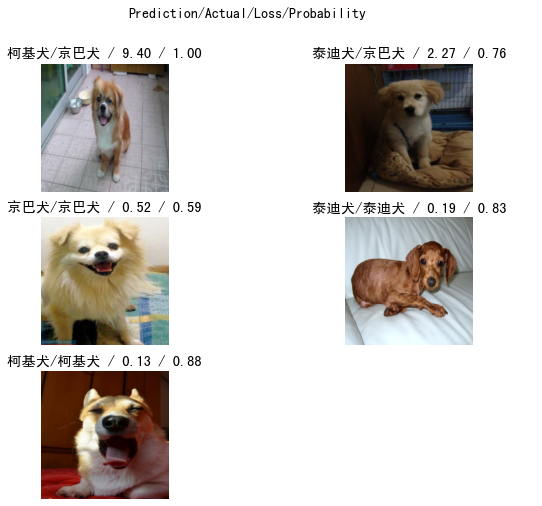

In [13]:
interp.plot_top_losses(5, nrows=3,figsize=(10,8))

In [14]:
interp.print_classification_report()

              precision    recall  f1-score   support

         京巴犬       1.00      0.92      0.96        26
         柯基犬       0.96      1.00      0.98        24
         泰迪犬       0.96      1.00      0.98        26

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76



In [15]:
interp.most_confused()

[('京巴犬', '柯基犬', 1), ('京巴犬', '泰迪犬', 1)]

#### 逐图片分析[实验功能]

In [16]:
# Get prediction scores. We convert tensors to numpy array to plot them later.
pred_scores = to_np(interp.preds)

In [17]:
w_results = ResultsWidget(
    dataset=learn.dls.valid_ds,
    y_score=pred_scores,
    y_label=[dogs.vocab[x] for x in np.argmax(pred_scores, axis=1)],
)

In [24]:
display(w_results.show())

### 可视化分析

<div class="alert alert-block alert-success">  
✅：

如何透过黑盒子，来了解人工智能模型真正学到了什么？  
</div>

In [171]:
im = PILImage.create('imgs/visul_dogs.jpg')

In [172]:
learn.predict(im)

('Huskies', tensor(0), tensor([0.9393, 0.0443, 0.0164]))

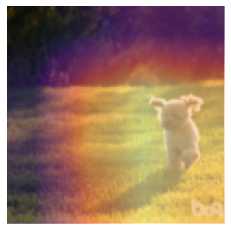

In [173]:
show_heatmap(im,learn,2)

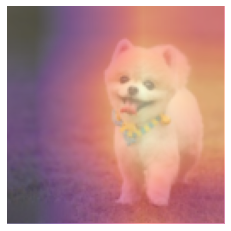

In [174]:
show_heatmap(PILImage.create('imgs/dog.jpg'),learn,2)

In [176]:
huskies_and_cat = PILImage.create('imgs/huskies_and_cat.png')

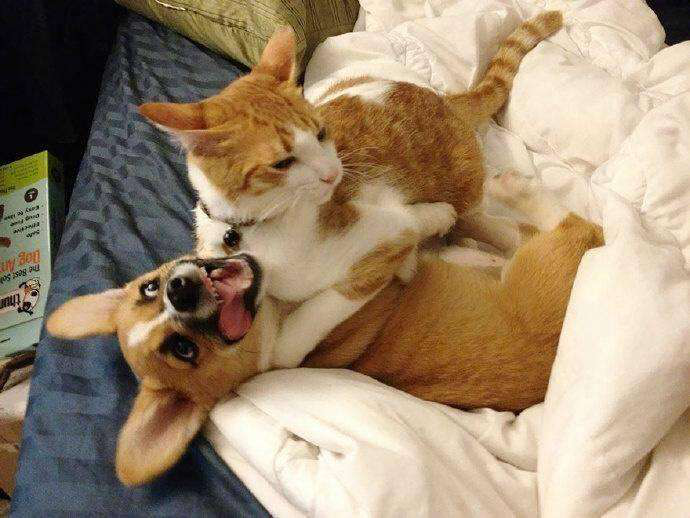

In [177]:
huskies_and_cat

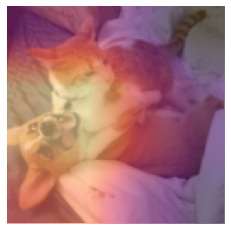

In [178]:
show_heatmap(huskies_and_cat,learn,2)

In [180]:
learn.dls.vocab

(#3) ['Huskies','Pekingese','Teddy']

### *Next

> 数据清理 + 获得更多的数据

> 刚刚下载失败的图像，可以手动下载然后上传到文件夹中

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

<details><summary>--数据清理的用法👇</summary>
    
`ImageClassifierCleaner` doesn't actually do the deleting or changing of labels for you; it just returns the indices of items to change. So, for instance, to delete (`unlink`) all images selected for deletion, we would run:

```python
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

To move images for which we've selected a different category, we would run:

```python
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```

> s: Cleaning the data and getting it ready for your model are two of the biggest challenges for data scientists; they say it takes 90% of their time. The fastai library aims to provide tools that make it as easy as possible.

Once we've cleaned up our data, we can retrain our model. Try it yourself, and see if your accuracy improves!  
</details>

<div class="alert alert-block alert-danger">  
<b>重要📌</b>  
    
**可能有些问题你不需要海量的数据：**
使用这些步骤清理数据集后，我们通常会看到此任务的准确性接近100％。而达到这样的结果，每个类别只有不足150张的图像。如您所见，常见的抱怨是您需要大量数据才能进行深度学习，这可能与事实相去甚远！
</div>

## Step 05. 模型部署与上线

<div class="alert alert-block alert-success">  
概要✅：

第五步中，我们一起尝试将训练好的模型转变成一个在线的web服务，并发布为在线服务;
    
模型部署阶段考虑的主要问题是：“该如何以自动化，可复制和可审核的方式部署机器学习模型？”
</div>

In [157]:
learn.export()

In [159]:
!ls -l --b=m *.pkl

-rw-rw-r-- 1 inesa-gao inesa-gao 45M 6月  21 22:34 export.pkl


In [161]:
learn_inf = load_learner('export.pkl')

In [162]:
learn_inf.predict('Teddy_Dog.jpg')

('泰迪犬', tensor(2), tensor([3.2490e-05, 1.8376e-06, 9.9997e-01]))

In [ ]:
learn_inf.dls.vocab

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
当我们千辛万苦完成了前面的数据获取、数据清洗、模型训练、模型评估等等步骤之后，终于等到老大说“上线”啦。想到辛苦训练出来的模型要被调用还有点小激动呢，可是真当下手的时候就有点懵了：模型要怎么部署？部署在哪里？有什么限制或要求？ 
    
- 部署环境的要求：云侧还是端侧？
- 一定要使用GPU么？
- 安全性
- 传输时延
- 高可用性
- 负载均衡
</div>

![](imgs/model_serving.png)

### 编写一个简单的GUI

> TBD: Need some explanation for details of the steps

In [19]:
#hide_output
btn_upload = widgets.FileUpload(description='上传')
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
test = PILImage.create(btn_upload.data[-1])

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(test.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(test)

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'结果: {pred}; 概率: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
#hide_output
btn_run = widgets.Button(description='分类')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'结果: {pred}; 概率: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

点击按钮试一下效果~

我们将上述内容整合进一个VBox中，完成GUI部分的内容设计。

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('上传一张图片!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### 部署你的应用

<div class="alert alert-block alert-success">  
概要✅：

此部分我们将通过最少的代码改动，将我们前面训练完成的模型部署为一个Web应用，并可以依托免费的服务承载你的人工智能应用，这样就可以分享给大家来使用了。
</div>

#### Voila

<div class="alert alert-block alert-success">  
概要✅：

voila是一个可以将Jupyter Notebook快速转变成web app的工具，更多内容参见[Github](https://github.com/voila-dashboards/voila)
</div>

![](https://tva1.sinaimg.cn/large/006tNbRwly1gaxioeh72ej30kb0g2wfc.jpg?imageView2/2/w/1120/q/90/interlace/1/ignore-error/1)

新建一个Notebook，完成web应用的开发~

### 发布你的应用 

<details><summary>--通过Binder发布应用👇</summary>
<div class="alert alert-block alert-success">  
✅：

TBD: make a read me file for this part: step by step

[Binder](https://mybinder.org/)是2020年人工智能圈子里十分火爆的一个应用.可以通过如下步骤将应用发布并托管在Binder上：

1. Add your notebook to a [GitHub repository](http://github.com/).
2. Paste the URL of that repo into Binder's URL, as shown in <<deploy-binder>>.
3. Change the File dropdown to instead select URL.
4. In the "URL to open" field, enter `/voila/render/02_web_app.ipynb` (replacing `name` with the name of for your notebook).
5. Click the clickboard button at the bottom right to copyt the URL and paste it somewhere safe. 
6. Click Launch.
</div>   
    
![](imgs/binder.png)
</details>

<div class="alert alert-block alert-info">
<b>提示💡:</b> 

还有一款常用的工具叫做`streamlit`，同样可以快速开发原型
</div>

## Step 06. 其它要考虑的问题

<div class="alert alert-block alert-info">
<b>值得思考的内容💡:</b> 

> 很多值得思考的内容，在此罗列

1. 持续迭代，持续收集数据；
2. 环境因素的考量；
3. 是否需要多个模型？
4. 部署位置
</div>

### 作业

<div class="alert alert-block alert-success">  
👍挑战一下自己👍：

1. 通过对数据进行优化及预处理，迭代模型，能够提升模型的检测结果？
2. 大胆Share你的模型
3. 再选一种或两种狗的类别，增加到数据集中，看是否可以获得理想中的结果？ 
4. 能够使用同一套pipeline构建点不一样的东西？ 比如分类正常样品/异常样品，分类手写数字/字母，分类男人/女人，分类美国人/澳大利亚人，分类...
</div>

### 环境准备及测试

1. docker image 的制作

```shell
## voila
pip install voila
jupyter serverextension enable voila --sys-prefix

## jupyter extension
pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions

jupyter contrib nbextension install --user

jupyter nbextensions_configurator enable --user

pip install bqplot
```
2. 网络联通性测试
3. 预训练模型和数据集准备
4. 其它bug测试
5. 和李方老师协调实训平台的资源